In [25]:
import os
import cv2 
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def readSortedSlices(path):
    
    slices = []
    for s in os.listdir(path):
        slices.append(path + '/' + s)
        
    slices.sort(key = lambda s: int(s[s.find('_') + 1 : s.find('.')]))

    ID = slices[0][slices[0].find('/') + 1 : slices[0].find('_')]
    print('CT scan of Patient %s consists of %d slices.' % (ID, len(slices)))  
    return (slices, ID)

def readImg(path):
    img = cv2.imread(path)
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def getSliceImages(slices):
    
    return list(map(readImg, slices))

In [16]:
slices, PatientID = readSortedSlices('sample-dataset')
sliceImgs = getSliceImages(slices)

CT scan of Patient ID00007637202177411956430 consists of 30 slices.


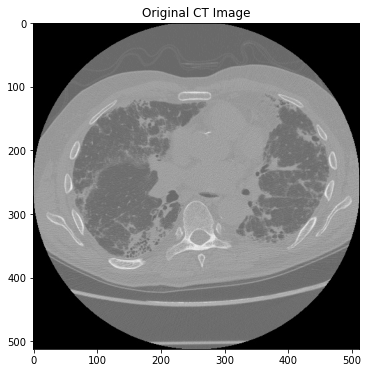

In [21]:
# Select a sample slice to work with
plt.figure(figsize = (12, 6))
im = readImg('sample-dataset/ID00007637202177411956430_16.jpg')
plt.title('Original CT Image')
plt.imshow(im, cmap='gray')

In [80]:
im.shape

(512, 512)

In [92]:
imflat = np.reshape(im, im.shape[0] * im.shape[1]).reshape(-1, 1)
print(imflat.shape)
imflat

(262144, 1)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [127]:
def applyKMeans(img, n_clust):
    
    imflat = np.reshape(im, im.shape[0] * im.shape[1]).reshape(-1, 1)
        
    kmeans = KMeans(n_clust)
    
    kmmodel = kmeans.fit(imflat)
    
    labels = kmmodel.labels_
    centers = kmmodel.cluster_centers_
    
    print(len(labels), 'Labels: \n', labels)
    
    # Center values correspond to intensity values 
    print(len(centers), 'Centers: \n', centers)
    
    # Print centers of labels
    centers_map = dict(zip(np.arange(n_clust), centers))
    print('Labels with corresponding centers:', centers_map)
    
    segmented = np.array([centers_map[label] for label in labels]).reshape(img.shape[0], img.shape[1]) 

    segmented = segmented.astype(int)
    
    # Plot the segmented image
    plt.figure(figsize = (12, 6))
    
    plt.title('CT Image on Segmentation with KMeans of K = ' + str(n_clust))
    plt.imshow(segmented, cmap='gray')

262144 Labels: 
 [1 1 1 ... 1 1 1]
2 Centers: 
 [[1.36680242e+02]
 [8.82521695e-02]]
Labels with corresponding centers: {0: array([136.68024247]), 1: array([0.08825217])}


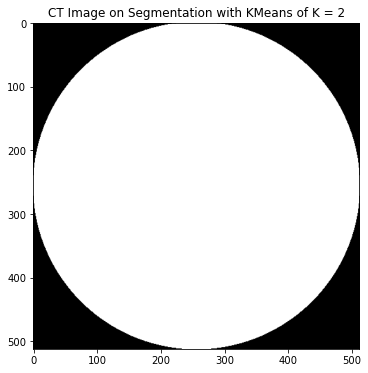

In [128]:
applyKMeans(im, 2)

262144 Labels: 
 [1 1 1 ... 1 1 1]
3 Centers: 
 [[1.57879115e+02]
 [8.82521695e-02]
 [1.12269714e+02]]
Labels with corresponding centers: {0: array([157.87911491]), 1: array([0.08825217]), 2: array([112.26971435])}


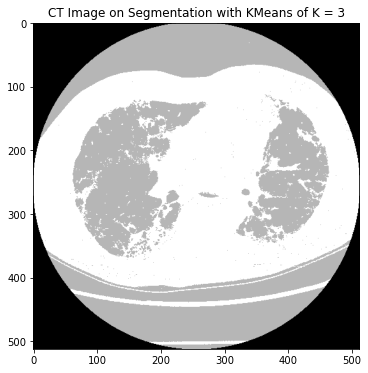

In [129]:
applyKMeans(im, 3)